In [15]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [16]:
df=pd.read_csv('diabetes.csv')

In [17]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [18]:
df.shape 
#rows:768
#cols:9

(768, 9)

In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
#check for missing values
df.isnull().sum()
#no missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
df['Pregnancies']=df['Pregnancies'].replace(0,df['Pregnancies'].mean())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())





In [23]:
features=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

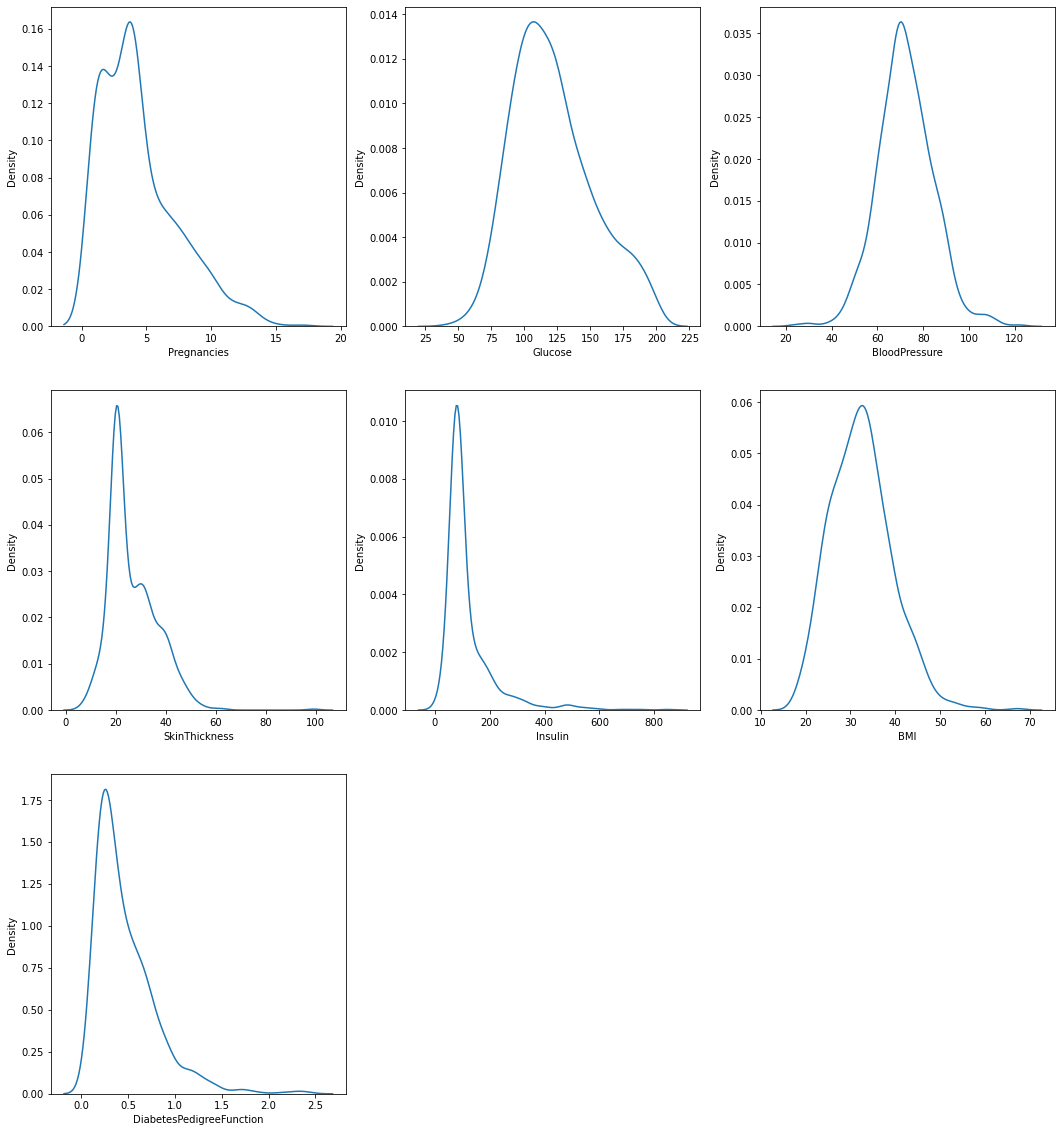

In [24]:
plt.figure(figsize=(18,20))
x=1
for i in features:
      if x<=7:
                ax=plt.subplot(3,3,x)
                sb.kdeplot(df[i])
                plt.xlabel(i)
      x=x+1


In [25]:
# data is not properly normally distributed
# there is a skewness is some features


In [26]:
# use z- score for normality testing
from scipy.stats import stats

In [27]:
z=np.abs(stats.zscore(df))
z

array([[0.5362511 , 0.86527574, 0.0210444 , ..., 0.46849198, 1.4259954 ,
        1.36589591],
       [1.1403533 , 1.20598931, 0.51658286, ..., 0.36506078, 0.19067191,
        0.73212021],
       [1.20689286, 2.01597855, 0.68176235, ..., 0.60439732, 0.10558415,
        1.36589591],
       ...,
       [0.20093022, 0.02240928, 0.0210444 , ..., 0.68519336, 0.27575966,
        0.73212021],
       [1.1403533 , 0.14197684, 1.01212132, ..., 0.37110101, 1.17073215,
        1.36589591],
       [1.1403533 , 0.94297153, 0.18622389, ..., 0.47378505, 0.87137393,
        0.73212021]])

In [28]:
thresold=3
print(np.where(z>3))

(array([  4,   8,  13,  18,  43,  45,  57,  58,  88, 106, 111, 120, 120,
       123, 125, 125, 153, 159, 177, 177, 186, 220, 228, 228, 247, 248,
       286, 298, 330, 370, 370, 371, 392, 395, 409, 415, 445, 445, 445,
       453, 455, 459, 486, 549, 579, 584, 593, 597, 621, 645, 655, 666,
       673, 684, 691, 695, 753], dtype=int64), array([6, 4, 4, 2, 2, 6, 3, 6, 0, 2, 4, 3, 5, 7, 2, 5, 4, 0, 2, 5, 4, 4,
       4, 6, 4, 4, 4, 0, 6, 4, 6, 6, 4, 6, 4, 4, 3, 5, 6, 7, 0, 7, 4, 2,
       3, 4, 6, 2, 6, 4, 4, 7, 5, 7, 2, 4, 4], dtype=int64))


In [29]:
final_Df=df[(z<3).all(axis=1)]

In [30]:
final_Df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.0,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.0,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5.0,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2.0,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1.0,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


<AxesSubplot:>

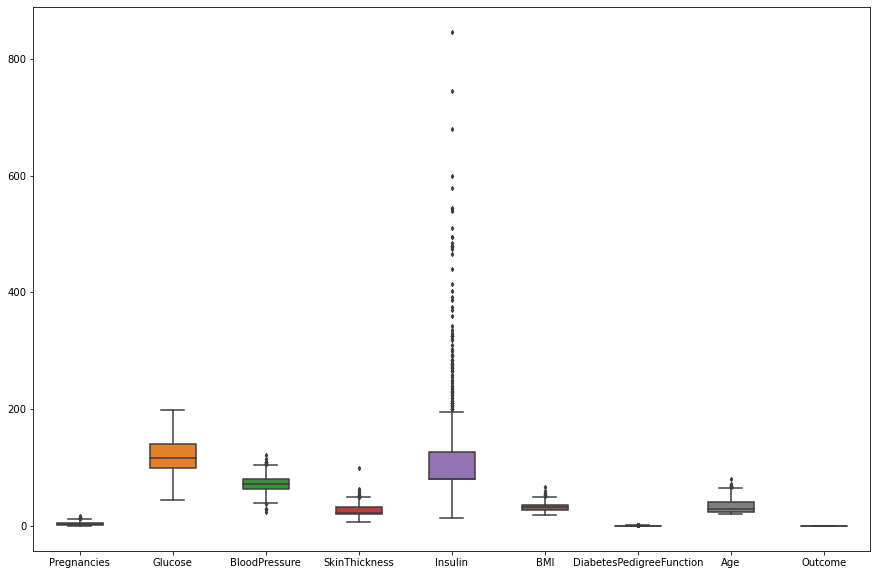

In [31]:
fig, ax = plt.subplots(figsize=(15,10))
sb.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)


<AxesSubplot:>

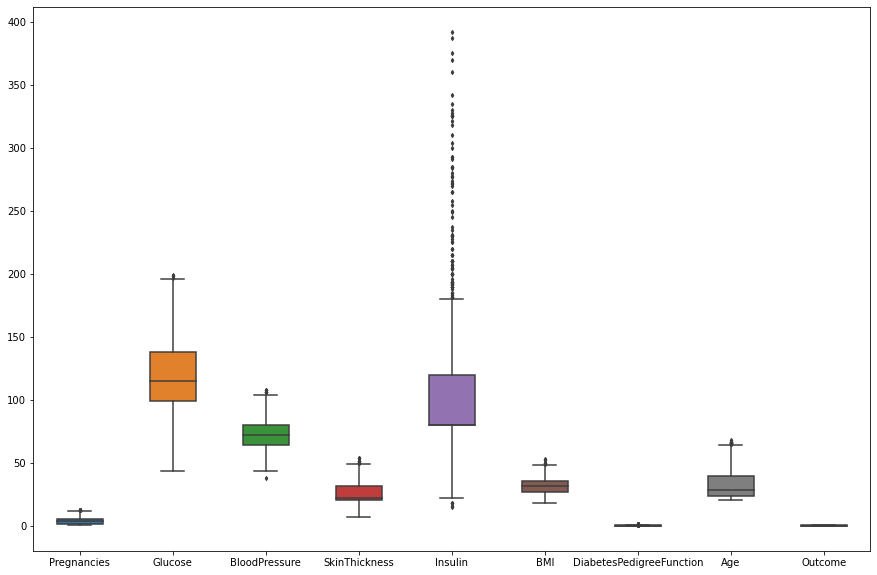

In [32]:
fig, ax = plt.subplots(figsize=(15,10))
sb.boxplot(data=final_Df, width= 0.5,ax=ax,  fliersize=3)


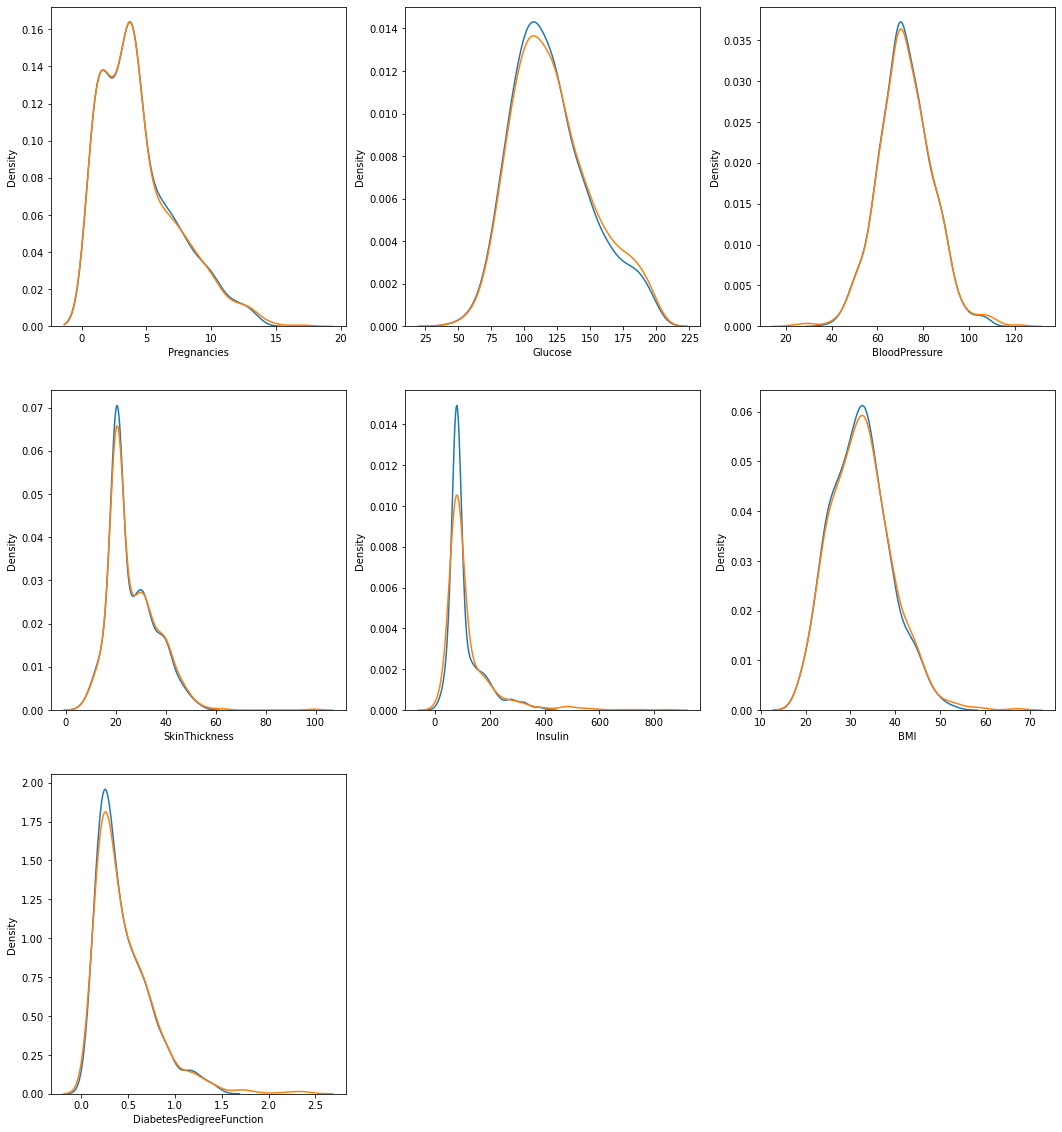

In [33]:
plt.figure(figsize=(18,20))
x=1
for i in features:
      if x<=7:
                ax=plt.subplot(3,3,x)
                sb.kdeplot(final_Df[i])
                sb.kdeplot(df[i])
                plt.xlabel(i)
      x=x+1


In [35]:
#check for correalation
t=df.corr()['Outcome'][:]
t


Pregnancies                 0.247971
Glucose                     0.492908
BloodPressure               0.162986
SkinThickness               0.175026
Insulin                     0.179185
BMI                         0.312254
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [36]:
X=df.drop('Outcome',axis=1)
y=df.Outcome

In [37]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_scaled=scale.fit_transform(X)

#check the VIF factor 
#if VIF factor in <5 that means there is no colinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['feature']=X.columns
vif

,VIF,feature
0,1.410013,Pregnancies
1,1.347415,Glucose
2,1.252549,BloodPressure
3,1.450493,SkinThickness
4,1.264171,Insulin
5,1.559203,BMI
6,1.056273,DiabetesPedigreeFunction
7,1.546208,Age


In [ ]:
# no need to drop any column
# VIF factor is <5

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size= 0.25, random_state = 355)
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [39]:
y_pred = log_reg.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,confusion_matrix

In [41]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7447916666666666

In [42]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[108,  17],
       [ 32,  35]], dtype=int64)

In [43]:
true_positive=cm[0][0]
true_negative=cm[1][1]
false_positive=cm[0][1]
false_negative=cm[1][0]


In [44]:
#accuracy
accuracy=(true_positive+true_negative)/(true_positive+true_negative+false_negative+false_positive)
accuracy

0.7447916666666666

In [45]:
#Recall
Recall=true_positive/(true_positive+false_negative)
Recall

0.7714285714285715

In [47]:
#precision
precision=true_positive/(true_positive+false_positive)
precision

0.864

In [48]:
# F1 Score
F1_Score = 2*(Recall * precision) / (Recall + precision)
F1_Score

0.8150943396226416

In [49]:
# area under the curve
auc=roc_auc_score(y_test,y_pred)
auc

0.6931940298507463

In [50]:
#ROC

In [51]:
fpr,tpr,thresolds=roc_curve(y_test,y_pred)

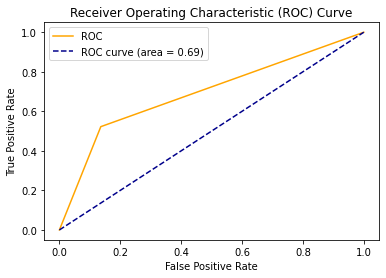

In [52]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()